In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import spacepy.time as spt
import spacepy.omni as om
from sklearn import tree

Qin-Denton/OMNI2 data not found in current format. This module has limited functionality.
Run spacepy.toolbox.update(QDomni=True) to download data


In [2]:
# On charge une bonne période de données
ticks = spt.tickrange('1980-01-01T00:00:00', '2017-01-01T00:00:00', deltadays = 1./24.)
d = om.get_omni(ticks)

Kp = d['Kp']
Bz = d['BzIMF']
V  = d['velo']
N  = d['dens']
dates = d['ticks'].UTC

In [3]:
input_data = np.stack((Bz,V,N)).T
output_data = Kp[:,None]

(335,)


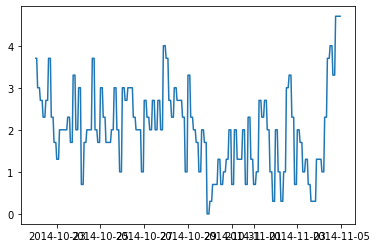

In [67]:
# Sélection d'une période de test:
from datetime import datetime
test_min, test_max = datetime(2014,10,22), datetime(2014,11,5)
in_test = np.logical_and(dates > test_min, dates < test_max)
train_index, = np.nonzero(np.logical_not(in_test))
test_index,  = np.nonzero(in_test)

X_train, X_test = input_data[train_index], input_data[test_index]
y_train, y_test = output_data[train_index], output_data[test_index]

plt.plot(dates[test_index], y_test)
print(np.shape(dates[test_index]))

(335,)
RMSE= 1.2168622517617458


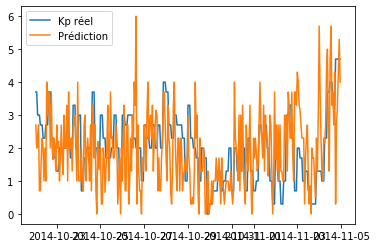

In [69]:
regr = tree.DecisionTreeRegressor()
model=regr.fit(X_train,y_train)
p_test = model.predict(X_test)
plt.plot(dates[test_index], y_test)
plt.plot(dates[test_index], p_test)
plt.legend(("Kp réel", "Prédiction"))
print("RMSE=", np.sqrt(mean_squared_error(y_test, p_test)))

In [36]:

tss = TimeSeriesSplit(n_splits=100)
# Évaluation de l'erreur du model:
errors = []
m_dates = []
for train_index, test_index in tss.split(input_data, output_data):
    X_train, X_test = input_data[train_index], input_data[test_index]
    y_train, y_test = output_data[train_index], output_data[test_index]
    dates_test = dates[test_index]
    model = regr.fit(X_train, y_train)
    p_test = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, p_test))
    errors.append(error)
    m_dates.append(dates_test[len(test_index)//2])
    #plt.figure()
    #plt.plot(dates_test, y_test)
    #plt.plot(dates_test, p_test)

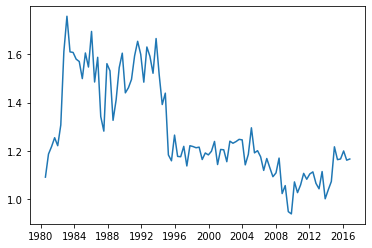

In [37]:
plt.plot(m_dates,errors)


(23,)


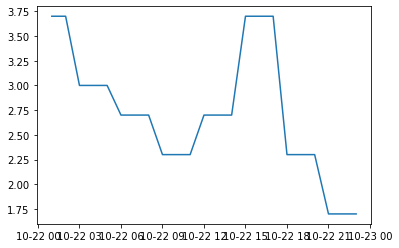

In [53]:
# Sélection d'une période de test:
from datetime import datetime
test_min, test_max = datetime(2014,10,22), datetime(2014,10,23)
in_test = np.logical_and(dates > test_min, dates < test_max)
train_index, = np.nonzero(np.logical_not(in_test))
test_index,  = np.nonzero(in_test)

X_train, X_test = input_data[train_index], input_data[test_index]
y_train, y_test = output_data[train_index], output_data[test_index]

plt.plot(dates[test_index], y_test)
print(np.shape(dates[test_index]))

In [49]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_test,y_test )

[Text(209.25, 201.90857142857143, 'X[2] <= 4.6\nmse = 0.401\nsamples = 23\nvalue = 2.722'),
 Text(131.52857142857144, 170.84571428571428, 'X[0] <= -1.5\nmse = 0.262\nsamples = 17\nvalue = 2.976'),
 Text(47.82857142857143, 139.78285714285715, 'X[0] <= -3.25\nmse = 0.247\nsamples = 9\nvalue = 3.256'),
 Text(23.914285714285715, 108.72, 'mse = 0.0\nsamples = 2\nvalue = 2.7'),
 Text(71.74285714285715, 108.72, 'X[1] <= 452.5\nmse = 0.204\nsamples = 7\nvalue = 3.414'),
 Text(47.82857142857143, 77.65714285714284, 'mse = 0.0\nsamples = 1\nvalue = 2.7'),
 Text(95.65714285714286, 77.65714285714284, 'X[2] <= 3.5\nmse = 0.139\nsamples = 6\nvalue = 3.533'),
 Text(71.74285714285715, 46.59428571428572, 'X[2] <= 2.3\nmse = 0.222\nsamples = 3\nvalue = 3.367'),
 Text(47.82857142857143, 15.531428571428563, 'mse = 0.0\nsamples = 2\nvalue = 3.7'),
 Text(95.65714285714286, 15.531428571428563, 'mse = 0.0\nsamples = 1\nvalue = 2.7'),
 Text(119.57142857142857, 46.59428571428572, 'mse = 0.0\nsamples = 3\nvalue =

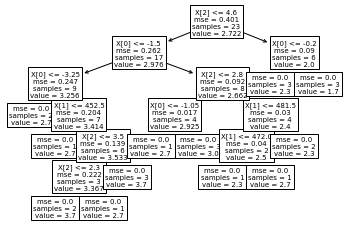

In [58]:
tree.plot_tree(clf,fontsize=7) 

In [59]:
from sklearn.tree import export_graphviz
import graphviz 


In [60]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_test,y_test )

In [61]:
dot_data=tree.export_graphviz(clf)
graph = graphviz.Source(dot_data)  

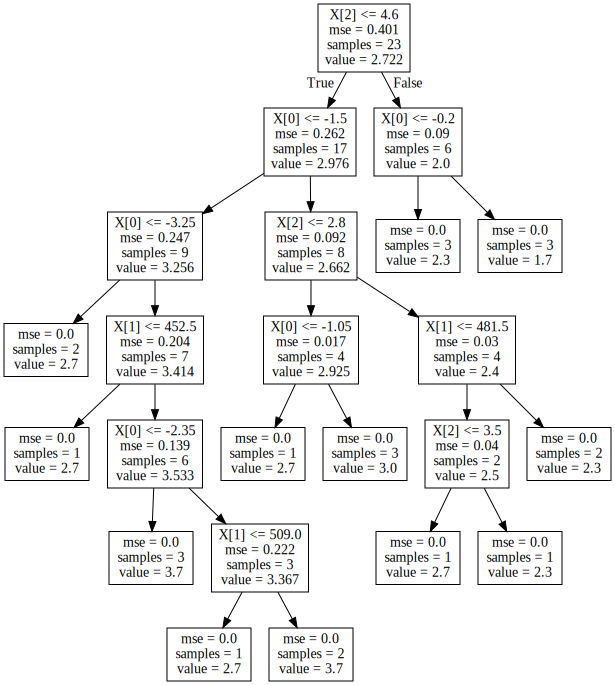

In [63]:
graph